In [1]:
# Now with tensorflow

import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

pickle_file = 'housingNantesAllInfo.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_prices_labels = save['train_prices_labels']
  train_nbRooms_labels = save['train_nbRooms_labels']
  train_surfaceHouse_labels = save['train_surfaceHouse_labels']
  train_surfaceLand_labels = save['train_surfaceLand_labels']
  train_nbPictures_labels = save['train_nbPictures_labels']
  valid_dataset = save['valid_dataset']
  valid_prices_labels = save['valid_prices_labels']
  valid_nbRooms_labels = save['valid_nbRooms_labels']
  valid_surfaceHouse_labels = save['valid_surfaceHouse_labels']
  valid_surfaceLand_labels = save['valid_surfaceLand_labels']
  valid_nbPictures_labels = save['valid_nbPictures_labels']



  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_prices_labels.shape,train_nbRooms_labels.shape,train_surfaceHouse_labels.shape,train_surfaceLand_labels.shape,train_nbPictures_labels.shape)
  print('Validation set', valid_dataset.shape, valid_prices_labels.shape,valid_nbRooms_labels.shape,valid_surfaceHouse_labels.shape,valid_surfaceLand_labels.shape,valid_nbPictures_labels.shape)

image_size = 56

('Training set', (457, 56, 56), (457, 1), (457, 1), (457, 1), (457, 1), (457, 1))
('Validation set', (196, 56, 56), (196, 1), (196, 1), (196, 1), (196, 1), (196, 1))


In [2]:
# clean prices == 0

price_equals_zero_list = []

for i,price in enumerate(train_prices_labels):
    if price == 0:
        price_equals_zero_list.append(i)  

print len(price_equals_zero_list)   

new_dim = train_prices_labels.shape[0]-len(price_equals_zero_list)

train_labels_prices_no_zeros = np.zeros((new_dim, 1))

train_labels_nbRooms_no_zeros = np.zeros((new_dim, 1))
train_labels_surfaceHouse_no_zeros = np.zeros((new_dim, 1))
train_labels_surfaceLand_no_zeros = np.zeros((new_dim, 1))
train_labels_nbPictures_no_zeros = np.zeros((new_dim, 1))

train_images_no_zeros = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(train_prices_labels):
    if price != 0:
        train_labels_prices_no_zeros[j][0] = price  
        j += 1

j = 0
for i,image in enumerate(train_dataset):
    if i not in price_equals_zero_list:
        train_images_no_zeros[j,:,:] = image  
        j += 1

j = 0
for i,nbRooms in enumerate(train_nbRooms_labels):
    if i not in price_equals_zero_list:
        train_labels_nbRooms_no_zeros[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(train_surfaceHouse_labels):
    if i not in price_equals_zero_list:
        train_labels_surfaceHouse_no_zeros[j][0] = surfaceHouse  
        j += 1

j = 0
for i,surfaceLand in enumerate(train_surfaceLand_labels):
    if i not in price_equals_zero_list:
        train_labels_surfaceLand_no_zeros[j][0] = surfaceLand  
        j += 1

j = 0
for i,nbPictures in enumerate(train_nbPictures_labels):
    if i not in price_equals_zero_list:
        train_labels_nbPictures_no_zeros[j][0] = nbPictures  
        j += 1
        
# for validation:

price_equals_zero_list = []

for i,price in enumerate(valid_prices_labels):
    if price == 0:
        price_equals_zero_list.append(i)  

print len(price_equals_zero_list)   

new_dim = valid_prices_labels.shape[0]-len(price_equals_zero_list) 

valid_labels_prices_no_zeros = np.zeros((new_dim, 1))
valid_labels_nbRooms_no_zeros = np.zeros((new_dim, 1))
valid_labels_surfaceHouse_no_zeros = np.zeros((new_dim, 1))
valid_labels_surfaceLand_no_zeros = np.zeros((new_dim, 1))
valid_labels_nbPictures_no_zeros = np.zeros((new_dim, 1))

valid_images_no_zeros = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(valid_prices_labels):
    if price != 0:
        valid_labels_prices_no_zeros[j][0] = price  
        j += 1

j = 0
for i,image in enumerate(valid_dataset):
    if i not in price_equals_zero_list:
        valid_images_no_zeros[j,:,:] = image  
        j += 1    

j = 0        
for i,nbRooms in enumerate(valid_nbRooms_labels):
    if i not in price_equals_zero_list:
        valid_labels_nbRooms_no_zeros[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(valid_surfaceHouse_labels):
    if i not in price_equals_zero_list:
        valid_labels_surfaceHouse_no_zeros[j][0] = surfaceHouse  
        j += 1

j = 0
for i,surfaceLand in enumerate(valid_surfaceLand_labels):
    if i not in price_equals_zero_list:
        valid_labels_surfaceLand_no_zeros[j][0] = surfaceLand  
        j += 1

j = 0
for i,nbPictures in enumerate(valid_nbPictures_labels):
    if i not in price_equals_zero_list:
        valid_labels_nbPictures_no_zeros[j][0] = nbPictures  
        j += 1

15
2


In [3]:
# clean surfaceHouse == 0

surface_equals_zero_list = []

for i,surface in enumerate(train_labels_surfaceHouse_no_zeros):
    if surface == float(0):
        surface_equals_zero_list.append(i)  

print len(surface_equals_zero_list)   

new_dim = train_labels_prices_no_zeros.shape[0]-len(surface_equals_zero_list) 

train_labels_prices_surface_clean = np.zeros((new_dim, 1))

train_labels_nbRooms_surface_clean = np.zeros((new_dim, 1))
train_labels_surfaceHouse_surface_clean = np.zeros((new_dim, 1))
train_labels_surfaceLand_surface_clean = np.zeros((new_dim, 1))
train_labels_nbPictures_surface_clean = np.zeros((new_dim, 1))

train_images_surface_clean = np.zeros((new_dim, image_size,image_size))

j = 0
for i,price in enumerate(train_labels_prices_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_prices_surface_clean[j][0] = price  
        j += 1
        
j = 0
for i,image in enumerate(train_images_no_zeros):
    if i not in surface_equals_zero_list:
        train_images_surface_clean[j,:,:] = image  
        j += 1    
        
j = 0
for i,nbRooms in enumerate(train_labels_nbRooms_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_nbRooms_surface_clean[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(train_labels_surfaceHouse_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_surfaceHouse_surface_clean[j][0] = surfaceHouse  
        j += 1
        
j = 0
for i,surfaceLand in enumerate(train_labels_surfaceLand_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_surfaceLand_surface_clean[j][0] = surfaceLand  
        j += 1

j = 0
for i,nbPictures in enumerate(train_labels_nbPictures_no_zeros):
    if i not in surface_equals_zero_list:
        train_labels_nbPictures_surface_clean[j][0] = nbPictures  
        j += 1 

# validation
surface_equals_zero_list = []

for i,surface in enumerate(valid_labels_surfaceHouse_no_zeros):
    if surface == float(0):
        surface_equals_zero_list.append(i)  

print len(surface_equals_zero_list)   

new_dim = valid_labels_prices_no_zeros.shape[0]-len(surface_equals_zero_list) 

valid_labels_prices_surface_clean = np.zeros((new_dim, 1))

valid_labels_nbRooms_surface_clean = np.zeros((new_dim, 1))
valid_labels_surfaceHouse_surface_clean = np.zeros((new_dim, 1))
valid_labels_surfaceLand_surface_clean = np.zeros((new_dim, 1))
valid_labels_nbPictures_surface_clean = np.zeros((new_dim, 1))

valid_images_surface_clean = np.zeros((new_dim, image_size,image_size))


j = 0
for i,price in enumerate(valid_labels_prices_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_prices_surface_clean[j][0] = price  
        j += 1
        
j = 0
for i,image in enumerate(valid_images_no_zeros):
    if i not in surface_equals_zero_list:
        valid_images_surface_clean[j,:,:] = image  
        j += 1    
        
j = 0
for i,nbRooms in enumerate(valid_labels_nbRooms_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_nbRooms_surface_clean[j][0] = nbRooms  
        j += 1

j = 0
for i,surfaceHouse in enumerate(valid_labels_surfaceHouse_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_surfaceHouse_surface_clean[j][0] = surfaceHouse  
        j += 1
        
j = 0
for i,surfaceLand in enumerate(valid_labels_surfaceLand_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_surfaceLand_surface_clean[j][0] = surfaceLand  
        j += 1
        
j = 0
for i,nbPictures in enumerate(valid_labels_nbPictures_no_zeros):
    if i not in surface_equals_zero_list:
        valid_labels_nbPictures_surface_clean[j][0] = nbPictures  
        j += 1 

43
21


In [4]:
train_labels_nbRooms_surface_clean.shape[0]

399

In [5]:
# reformat prices to have then between 0 and 1

max_value = max(max(train_labels_prices_surface_clean),max(valid_labels_prices_surface_clean))

train_prices_labels = train_labels_prices_surface_clean / max_value

valid_prices_labels = valid_labels_prices_surface_clean / max_value


train_nbRooms_labels = train_labels_nbRooms_surface_clean
train_surfaceHouse_labels = train_labels_surfaceHouse_surface_clean
train_surfaceLand_labels = train_labels_surfaceLand_surface_clean
train_nbPictures_labels = train_labels_nbPictures_surface_clean
valid_nbRooms_labels = valid_labels_nbRooms_surface_clean
valid_surfaceHouse_labels = train_labels_surfaceHouse_surface_clean
valid_surfaceLand_labels = valid_labels_surfaceLand_surface_clean
valid_nbPictures_labels = valid_labels_nbPictures_surface_clean


In [6]:
# reformat images to 2d array 56*56
train_images = train_images_surface_clean.reshape((-1, image_size * image_size)).astype(np.float32)
valid_images = valid_images_surface_clean.reshape((-1, image_size * image_size)).astype(np.float32)


# build the dataset for complementary info from json files
nb_variables = 4

train_info = np.zeros((train_images.shape[0],nb_variables))

# Reformat the variables to have them between -1 and 1
nbRooms_max = max(max(train_nbRooms_labels), max(valid_nbRooms_labels))
surface_max = max(max(train_surfaceHouse_labels), max(valid_surfaceHouse_labels))
surfaceLand_max = max(max(train_surfaceLand_labels), max(valid_surfaceLand_labels))
nbPictures_max = max(max(train_nbPictures_labels), max(valid_nbPictures_labels))

for i in range(train_images.shape[0]):
    train_info[i][0] = ( train_nbRooms_labels[i] - nbRooms_max /2 ) / nbRooms_max
    train_info[i][1] = ( train_surfaceHouse_labels[i] - surface_max /2 ) / surface_max
    train_info[i][2] = ( train_surfaceLand_labels[i] - surfaceLand_max /2 ) / surfaceLand_max
    train_info[i][3] = ( train_nbPictures_labels[i] - nbPictures_max /2 ) / nbPictures_max
    
valid_info = np.zeros((valid_images.shape[0],nb_variables))

for i in range(valid_images.shape[0]):
    valid_info[i][0] = ( valid_nbRooms_labels[i] - nbRooms_max /2 ) / nbRooms_max
    valid_info[i][1] = ( valid_surfaceHouse_labels[i] - surface_max /2 ) / surface_max
    valid_info[i][2] = ( valid_surfaceLand_labels[i] - surfaceLand_max /2 ) / surfaceLand_max
    valid_info[i][3] = ( valid_nbPictures_labels[i] - nbPictures_max /2 ) / nbPictures_max
    


In [9]:
import math

# parameters to the function graph
num_labels= 1
dtype = tf.float32

#batch_size = 128
hidden_layer_size = 20
regularization_beta = 5e-4


graph = tf.Graph()
with graph.as_default():

  # Input data.
  # Load the training, validation into constants that are
  # attached to the graph.
    tf_train_info = tf.placeholder(dtype, shape=[None,nb_variables])
    tf_train_price = tf.placeholder(dtype, shape=[None,train_prices_labels.shape[1]])
    tf_valid_info = tf.placeholder(dtype, shape=[None,nb_variables])
  
  # Variables.
    
    # hidden layer
    
    weights_hidden = tf.Variable(tf.truncated_normal([nb_variables, hidden_layer_size]))
    biases_hidden = tf.Variable(tf.zeros([hidden_layer_size]))
    hidden = tf.nn.relu(tf.matmul(tf_train_info , weights_hidden) + biases_hidden)
    
    weights_hidden_2 = tf.Variable(tf.truncated_normal([hidden_layer_size,hidden_layer_size]
        ,stddev=1 / math.sqrt(float(nb_variables))))
    biases_hidden_2 = tf.Variable(tf.zeros([hidden_layer_size]))
    hidden_2 = tf.nn.relu(tf.matmul(hidden, weights_hidden_2) + biases_hidden_2)
    
    # output layer
    
    weights_output = tf.Variable(tf.truncated_normal([hidden_layer_size,num_labels]
                                 ,stddev=1/ math.sqrt(float(nb_variables))))
    biases_output = tf.Variable(tf.zeros([num_labels]))
    
    # Training
    
    price_estimation = tf.matmul(hidden_2, weights_output) + biases_output
    
    loss = tf.reduce_sum(tf.square(price_estimation - tf_train_price))/train_prices_labels.shape[0]
  
    # L2 regularization
    
    regularizers = (tf.nn.l2_loss(weights_hidden) + tf.nn.l2_loss(biases_hidden) + 
                    tf.nn.l2_loss(weights_hidden_2) + tf.nn.l2_loss(biases_hidden_2) +
                    tf.nn.l2_loss(weights_output) + tf.nn.l2_loss(biases_output))
    
    loss = loss + regularization_beta * regularizers
 
  # Optimizer.
  # We are going to find the minimum of this loss using AdagradOptimizer.
  #  AdagradOptimizer
    optimizer = tf.train.AdagradOptimizer(0.02).minimize(loss)
    #optimizer = tf.train.MomentumOptimizer(5, 0.001).minimize(loss)
  
  # Predictions for the training and validation.
  # Predictions
    
    train_prediction = price_estimation
    
    hidden_validation = tf.nn.relu(tf.matmul(tf_valid_info, weights_hidden) + biases_hidden)
    hidden_validation_2 = tf.nn.relu(tf.matmul(hidden_validation, weights_hidden_2) + biases_hidden_2)
    valid_prediction = tf.matmul(hidden_validation_2, weights_output) + biases_output
    

In [11]:
num_steps = 100001

def accuracy(prediction, price):
  return np.mean(100 - 100*np.abs((prediction - price) / price))

with tf.Session(graph=graph) as session:
  # This is a one-time operation which ensures the parameters get initialized as
  # we described in the graph: random weights for the matrix, zeros for the
  # biases. 
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the loss value and the training predictions returned as numpy
    # arrays.
    _, l, predictions, valid_predictions = session.run([optimizer, loss, train_prediction, valid_prediction]
                                        , feed_dict={tf_train_info: train_info,tf_train_price: train_prices_labels,tf_valid_info: valid_info })
    if (step % 10000 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Training accuracy: %.1f%%' % accuracy(
        predictions, train_prices_labels))
      # Calling .eval() on valid_prediction is basically like calling run(), but
      # just to get that one numpy array. Note that it recomputes all its graph
      # dependencies.
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_predictions, valid_prices_labels))
        

Initialized
Loss at step 0: 0.864911
Training accuracy: -800.3%
Validation accuracy: -761.8%
Loss at step 10000: 0.025004
Training accuracy: 61.8%
Validation accuracy: 19.6%
Loss at step 20000: 0.017266
Training accuracy: 63.5%
Validation accuracy: 20.1%
Loss at step 30000: 0.013167
Training accuracy: 64.4%
Validation accuracy: 20.1%
Loss at step 40000: 0.011022
Training accuracy: 64.8%
Validation accuracy: 19.9%
Loss at step 50000: 0.009873
Training accuracy: 64.9%
Validation accuracy: 20.1%
Loss at step 60000: 0.009172
Training accuracy: 64.9%
Validation accuracy: 19.6%
Loss at step 70000: 0.008733
Training accuracy: 65.1%
Validation accuracy: 20.4%
Loss at step 80000: 0.008424
Training accuracy: 65.1%
Validation accuracy: 20.0%
Loss at step 90000: 0.008196
Training accuracy: 65.2%
Validation accuracy: 19.3%
Loss at step 100000: 0.008032
Training accuracy: 65.9%
Validation accuracy: 19.0%


('weight', array([ 0.1439344]))
('bias', array([ 0.20662068]))


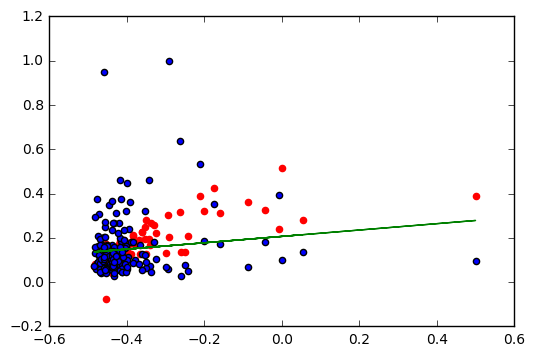

In [137]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from pylab import *

x = []

for i in range(valid_info.shape[0]):
    x.append(valid_info[i][1])

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
result_lr = regr.fit(train_info, train_prices_labels)

prices_estimation = result_lr.predict(valid_info)

w,b = polyfit(x, valid_prices_labels, 1)

print('weight', w)
print('bias', b)

pred_w = weight
pred_b = bias

pred_y = w*x + b

plt.scatter(x,valid_predictions,color="r")

plt.plot(x, pred_y,color="g")

plt.scatter(x, valid_prices_labels)

plt.show()





('weight', array([ 0.78106769]))
('bias', array([ 0.46465185]))


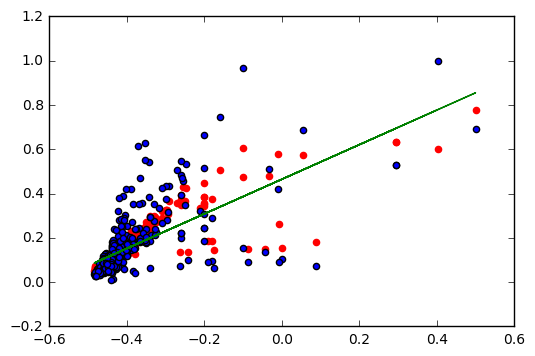

Rsquared on train:  0.536332123147
Rsquared on validation:  -0.224229256642


In [138]:

x = []

for i in range(train_info.shape[0]):
    x.append(train_info[i][1])

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
result_lr = regr.fit(train_info, train_prices_labels)

prices_estimation = result_lr.predict(valid_info)

w,b = polyfit(x, train_prices_labels, 1)

print('weight', w)
print('bias', b)

pred_w = weight
pred_b = bias

pred_y = w*x + b

plt.scatter(x, predictions,color="r")

plt.plot(x, pred_y,color="g")

plt.scatter(x, train_prices_labels)

plt.show()

print 'Rsquared on train: ', result_lr.score(train_info, train_prices_labels)
print 'Rsquared on validation: ', result_lr.score(valid_info, valid_prices_labels)




In [139]:
train_prices_labels

array([[ 0.07177419],
       [ 0.06451613],
       [ 0.06989247],
       [ 0.14332581],
       [ 0.17977204],
       [ 0.05322581],
       [ 0.1179672 ],
       [ 0.07870914],
       [ 0.03565108],
       [ 0.0719086 ],
       [ 0.05806452],
       [ 0.18227957],
       [ 0.16451613],
       [ 0.14422043],
       [ 0.06290323],
       [ 0.42150538],
       [ 0.13010753],
       [ 0.10026882],
       [ 0.15236559],
       [ 0.12615054],
       [ 0.05483871],
       [ 0.0624086 ],
       [ 0.16633548],
       [ 0.19032258],
       [ 0.07903226],
       [ 0.08333333],
       [ 0.07741935],
       [ 0.06155914],
       [ 0.14991935],
       [ 0.13481452],
       [ 0.21236559],
       [ 0.06075269],
       [ 0.09784946],
       [ 0.28225806],
       [ 0.15451613],
       [ 0.06814516],
       [ 0.10063548],
       [ 0.04891935],
       [ 0.06451613],
       [ 0.69086022],
       [ 0.13458925],
       [ 0.12435484],
       [ 0.10833333],
       [ 0.06021505],
       [ 0.12641129],
       [ 0

In [140]:
plt.scatter(train_info, predictions,color="r")
plt.scatter(train_info, train_prices_labels)

plt.show()

ValueError: x and y must be the same size

In [109]:
train_info

array([[-0.4 ,  0.  ,  0.  ,  0.  ],
       [-0.3 ,  0.  ,  0.  ,  0.  ],
       [-0.3 ,  0.  ,  0.  ,  0.  ],
       ..., 
       [-0.2 ,  0.  ,  0.  ,  0.  ],
       [-0.25,  0.  ,  0.  ,  0.  ],
       [-0.1 ,  0.  ,  0.  ,  0.  ]])

In [130]:
count = 0
for surface in train_surfaceHouse_labels:
    if surface[0] == float(0):
        count += 1
count

43

In [131]:
len(train_surfaceHouse_labels)

442

In [132]:
count = 0
for surface in valid_surfaceHouse_labels:
    if surface[0] == float(0):
        count += 1
count

21

In [78]:
train_info[2]

array([-0.42857143, -0.462     , -0.5       , -0.3       ])

In [149]:
len(np.argmax(train_info,1))

399

In [47]:
train_info

array([[-0.28571429, -0.41116   , -0.5       , -0.4       ],
       [-0.42857143, -0.458     , -0.5       , -0.3       ],
       [-0.42857143, -0.462     , -0.5       , -0.3       ],
       ..., 
       [-0.42857143, -0.449     , -0.5       , -0.2       ],
       [-0.14285714, -0.2       , -0.29526597, -0.25      ],
       [-0.28571429, -0.368     , -0.5       , -0.1       ]])

In [64]:
comp_array_valid = np.zeros((valid_predictions.shape[0],2))

for i in range(valid_predictions.shape[0]):
    comp_array_valid[i][0] = valid_predictions[i][0]
    comp_array_valid[i][1] = valid_prices_labels[i][0]
    
comp_array_train = np.zeros((predictions.shape[0],2))

for i in range(predictions.shape[0]):
    comp_array_train[i][0] = predictions[i][0]
    comp_array_train[i][1] = train_prices_labels[i][0]    

In [62]:
comp_array_valid

array([[ 0.18816525,  0.09677419],
       [ 0.10017668,  0.20537634],
       [ 0.06069141,  0.12473118],
       [ 0.10782432,  0.04408602],
       [ 0.21156824,  0.09833333],
       [ 0.08096712,  0.07204301],
       [ 0.11266118,  0.06827957],
       [ 0.07087176,  0.09139785],
       [ 0.05329721,  0.13387097],
       [ 0.39420956,  0.63655914],
       [ 0.11970346,  0.1172043 ],
       [ 0.14074725,  0.05483871],
       [ 0.10482191,  0.02956989],
       [ 0.26691109,  0.11182796],
       [ 0.97711486,  0.35483871],
       [ 0.13384745,  0.1827957 ],
       [-2.26224494,  0.06362366],
       [ 0.14526391,  0.14513441],
       [ 0.10219025,  0.09225806],
       [ 0.16776007,  0.1879543 ],
       [ 0.03940421,  0.11774194],
       [ 0.1106761 ,  0.13426882],
       [ 0.25181121,  0.1983871 ],
       [ 0.14307237,  0.14096774],
       [ 0.07643329,  0.08494624],
       [ 0.12836158,  0.08817204],
       [ 0.12956452,  0.05564516],
       [ 0.08733969,  0.16935484],
       [ 0.1462543 ,

In [65]:
comp_array_train

array([[ 0.18687183,  0.07177419],
       [ 0.05429315,  0.06451613],
       [ 0.04955869,  0.06989247],
       [ 0.13831067,  0.14332581],
       [ 0.18843448,  0.17977204],
       [ 0.04779869,  0.05322581],
       [ 0.09153663,  0.1179672 ],
       [ 0.08226865,  0.07870914],
       [ 0.02798199,  0.03565108],
       [ 0.12248694,  0.0719086 ],
       [ 0.07747196,  0.05806452],
       [ 0.12046694,  0.18227957],
       [ 0.14667922,  0.16451613],
       [ 0.13928419,  0.14422043],
       [ 0.12177088,  0.06290323],
       [ 0.29050809,  0.42150538],
       [ 0.1106761 ,  0.13010753],
       [ 0.10926598,  0.10026882],
       [ 0.13714844,  0.15236559],
       [ 0.1519708 ,  0.12615054],
       [ 0.03940421,  0.05483871],
       [ 0.08152407,  0.0624086 ],
       [ 0.15643436,  0.16633548],
       [ 0.14493978,  0.19032258],
       [ 0.06290298,  0.07903226],
       [ 0.09915095,  0.08333333],
       [ 0.09903764,  0.07741935],
       [ 0.09173834,  0.06155914],
       [ 0.17539912,

In [110]:
valid_prices_labels

array([[ 0.09677419],
       [ 0.20537634],
       [ 0.12473118],
       [ 0.04408602],
       [ 0.09833333],
       [ 0.07204301],
       [ 0.06827957],
       [ 0.09139785],
       [ 0.13387097],
       [ 0.63655914],
       [ 0.1172043 ],
       [ 0.05483871],
       [ 0.02956989],
       [ 0.11182796],
       [ 0.35483871],
       [ 0.1827957 ],
       [ 0.06362366],
       [ 0.14513441],
       [ 0.09225806],
       [ 0.1879543 ],
       [ 0.11774194],
       [ 0.13426882],
       [ 0.1983871 ],
       [ 0.14096774],
       [ 0.08494624],
       [ 0.08817204],
       [ 0.05564516],
       [ 0.16935484],
       [ 0.2411828 ],
       [ 0.1827957 ],
       [ 0.16182796],
       [ 0.06693548],
       [ 0.22308495],
       [ 0.06362366],
       [ 0.09032258],
       [ 0.06504839],
       [ 0.07768817],
       [ 0.08064516],
       [ 0.23548387],
       [ 0.09354839],
       [ 0.1094086 ],
       [ 0.32252688],
       [ 0.08817204],
       [ 0.08602151],
       [ 0.46236559],
       [ 0

In [111]:
valid_labels_prices_surface_clean

array([[  180000.],
       [  382000.],
       [  232000.],
       [   82000.],
       [  182900.],
       [  134000.],
       [  127000.],
       [  170000.],
       [  249000.],
       [ 1184000.],
       [  218000.],
       [  102000.],
       [   55000.],
       [  208000.],
       [  660000.],
       [  340000.],
       [  118340.],
       [  269950.],
       [  171600.],
       [  349595.],
       [  219000.],
       [  249740.],
       [  369000.],
       [  262200.],
       [  158000.],
       [  164000.],
       [  103500.],
       [  315000.],
       [  448600.],
       [  340000.],
       [  301000.],
       [  124500.],
       [  414938.],
       [  118340.],
       [  168000.],
       [  120990.],
       [  144500.],
       [  150000.],
       [  438000.],
       [  174000.],
       [  203500.],
       [  599900.],
       [  164000.],
       [  160000.],
       [  860000.],
       [   98000.],
       [  322370.],
       [  159940.],
       [  160000.],
       [  240000.],


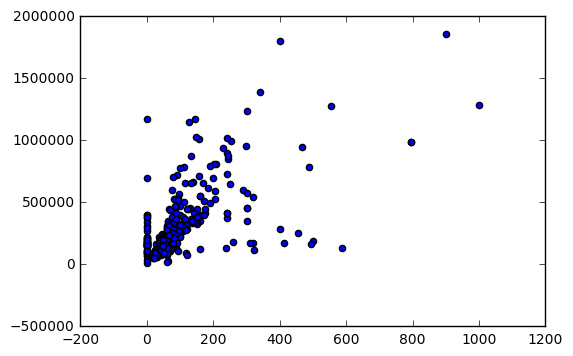

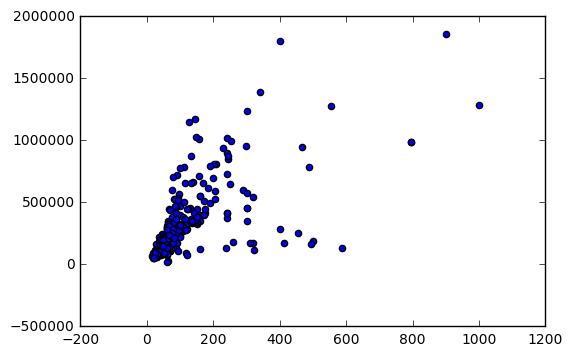

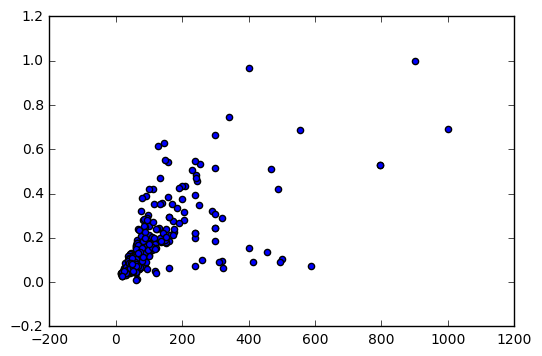

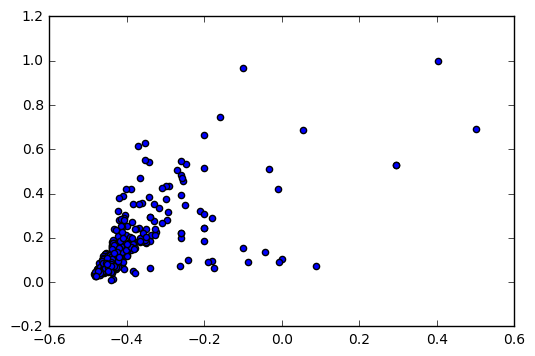

In [117]:
plt.scatter(train_labels_surfaceHouse_no_zeros,train_labels_prices_no_zeros)
plt.show()

plt.scatter(train_labels_surfaceHouse_surface_clean,train_labels_prices_surface_clean)
plt.show()

plt.scatter(train_surfaceHouse_labels,train_prices_labels)
plt.show()

plt.scatter(var_test,train_prices_labels)
plt.show()

In [116]:
var_test = (train_surfaceHouse_labels - surface_max /2 ) / surface_max

In [ ]:
x = []

for i in range(train_info.shape[0]):
    x.append(train_info[i][0])